In [2]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [14]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Linear Regression

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)

In [2]:
# Return the R^2 of the prediction.
reg.score(X, y)

1.0

In [3]:
# Estimated coefficients for the linear regression problem
reg.coef_

array([1., 2.])

In [4]:
# Independent term in the linear model
reg.intercept_

3.000000000000001

In [5]:
# Predict using the linear model.
reg.predict(np.array([[3, 5]]))

array([16.])

# Load data

In [4]:
# Load dataset

url= "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset = pandas.read_csv(url, names=names)

# Data Description

In [5]:
print(dataset.shape)

(150, 5)


In [6]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [7]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
#number of instances for each type
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# visualization

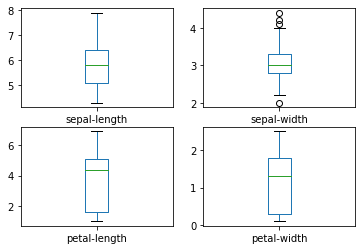

In [9]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

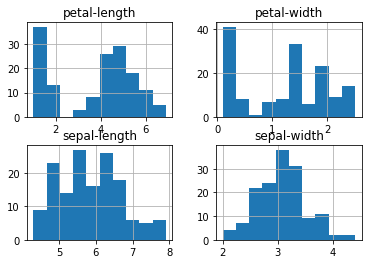

In [10]:
#histogram
dataset.hist()
plt.show()

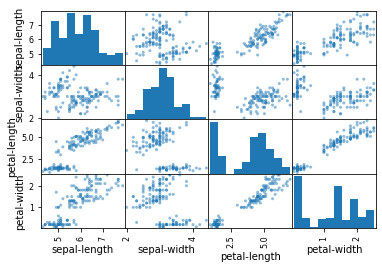

In [11]:
#scatter plot
scatter_matrix(dataset)
plt.show()

# Cross Validation

In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size= 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size=validation_size, 
                                                                                random_state=seed)

In [15]:
# Test options and evaluation metric
scoring = 'accuracy'
seet = 7

#estimate model using Logistic Regression
kfold= model_selection.KFold(n_splits=10, random_state=seed)
cv_results= model_selection.cross_val_score(LogisticRegression(), X_train, Y_train, cv=kfold, scoring=scoring)
print(cv_results.mean(),cv_results.std())

0.9666666666666666 0.04082482904638632


# Obtaining coefficients and prediction

In [21]:
logistic = LogisticRegression()
logistic.fit(X_train, Y_train).score(X_validation,Y_validation)
# score returns the mean accuracy on the given test data and labels.

0.8

In [22]:
# predicted result
iris_y_pred=logistic.predict(X_validation)
print(iris_y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


In [20]:
# predicted probability
iris_y_prob=logistic.predict_proba(X_validation)
print(iris_y_prob)

[[2.34375162e-03 2.38761156e-01 7.58895093e-01]
 [1.27728375e-02 2.81718580e-01 7.05508582e-01]
 [9.09512029e-01 9.04202533e-02 6.77180031e-05]
 [1.48722255e-02 3.37974623e-01 6.47153152e-01]
 [2.83447398e-03 2.46111373e-01 7.51054153e-01]
 [6.66874785e-01 3.32706593e-01 4.18622425e-04]
 [1.38711097e-02 7.02878627e-01 2.83250263e-01]
 [2.31961958e-02 5.80964410e-01 3.95839394e-01]
 [8.80335732e-01 1.19507751e-01 1.56517228e-04]
 [4.27176969e-02 6.07882148e-01 3.49400155e-01]
 [5.74173438e-03 4.91238854e-01 5.03019411e-01]
 [4.53007012e-02 3.27133739e-01 6.27565560e-01]
 [9.49829112e-01 5.01446948e-02 2.61935814e-05]
 [5.31032067e-04 1.20999021e-01 8.78469947e-01]
 [8.65206504e-01 1.34744043e-01 4.94531876e-05]
 [7.79402802e-03 2.07240502e-01 7.84965470e-01]
 [2.28084610e-04 4.31015064e-01 5.68756851e-01]
 [1.31431619e-03 2.84686565e-01 7.13999119e-01]
 [9.26541741e-01 7.33928879e-02 6.53709202e-05]
 [7.99560110e-01 2.00338089e-01 1.01801239e-04]
 [6.23806609e-02 7.65168261e-01 1.724510

In [18]:
#performance on validation set
confusion_matrix(Y_validation,iris_y_pred)

array([[ 7,  0,  0],
       [ 0,  7,  5],
       [ 0,  1, 10]], dtype=int64)

# Seed and random state

In [18]:
import numpy as np
a, b = np.arange(10).reshape((5, 2)), range(5)
print(a)
print(b)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
range(0, 5)


In [19]:
model_selection.train_test_split(a, b)

[array([[6, 7],
        [8, 9],
        [4, 5]]), array([[2, 3],
        [0, 1]]), [3, 4, 2], [1, 0]]

In [21]:
# Try to run it again:
model_selection.train_test_split(a, b)

[array([[2, 3],
        [8, 9],
        [0, 1]]), array([[6, 7],
        [4, 5]]), [1, 4, 0], [3, 2]]

In [23]:
# Then try:
model_selection.train_test_split(a, b,random_state=7)

[array([[4, 5],
        [2, 3],
        [8, 9]]), array([[0, 1],
        [6, 7]]), [2, 1, 4], [0, 3]]

In [24]:
model_selection.train_test_split(a, b,random_state=7)

[array([[4, 5],
        [2, 3],
        [8, 9]]), array([[0, 1],
        [6, 7]]), [2, 1, 4], [0, 3]]

# KNN

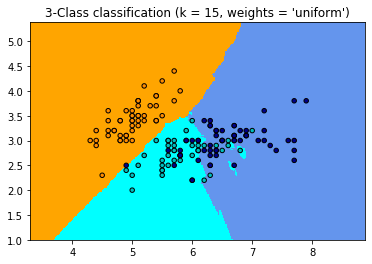

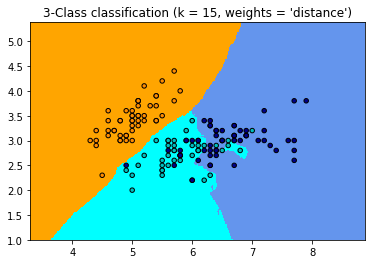

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# train multiple algorithms

In [31]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold= model_selection.KFold(n_splits=10, random_state=seed)
    cv_results= model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)
